In [1]:
#Udacity House Price Prediction Project

In [1]:
#Business Understanding (a brief description of the problem and questions of interest/null hypotheses)
#In that case, my business is a real estate agency. They want to scale up their customer scope 
#to increase their revenue by meeting the correct customer with the correct house. 
#To be able to achieve this target, they should dominate the prices of all houses in the market.
#I'll train a prediction model for them to be succeed.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


filename = "C:/Users/admKendirliB/data.csv"
print(filename)
df = pd.read_csv(filename)

C:/Users/admKendirliB/data.csv


In [406]:
#let's get familiar with data

In [3]:
#Data Understanding (access and explore)

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [29]:
df.shape

(4600, 18)

In [30]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [166]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
#Data Preparation (cleaning) (not necessary for our dataset)

In [6]:
df.count()

date             4600
price            4600
bedrooms         4600
bathrooms        4600
sqft_living      4600
sqft_lot         4600
floors           4600
waterfront       4600
view             4600
condition        4600
sqft_above       4600
sqft_basement    4600
yr_built         4600
yr_renovated     4600
street           4600
city             4600
statezip         4600
country          4600
dtype: int64

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
df.max()

date             2014-07-10 00:00:00
price                     26590000.0
bedrooms                         9.0
bathrooms                        8.0
sqft_living                    13540
sqft_lot                     1074218
floors                           3.5
waterfront                         1
view                               4
condition                          5
sqft_above                      9410
sqft_basement                   4820
yr_built                        2014
yr_renovated                    2014
street             Valley View Trail
city                    Yarrow Point
statezip                    WA 98354
country                          USA
dtype: object

In [9]:
df.min()

date             2014-05-02 00:00:00
price                            0.0
bedrooms                         0.0
bathrooms                        0.0
sqft_living                      370
sqft_lot                         638
floors                           1.0
waterfront                         0
view                               0
condition                          1
sqft_above                       370
sqft_basement                      0
yr_built                        1900
yr_renovated                       0
street                  1 View Ln NE
city                          Algona
statezip                    WA 98001
country                          USA
dtype: object

In [10]:
print(df.groupby(['bedrooms'])['bedrooms'].count().sort_values(ascending=False)) 
#houses mostly have bedrooms between 2 to 5.

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64


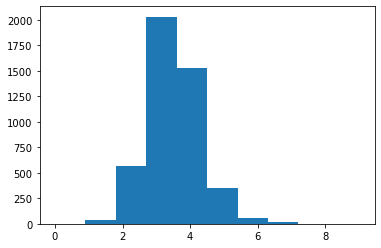

In [11]:
plt.hist(df['bedrooms']);

In [12]:
print(df.groupby(['bathrooms'])['bathrooms'].count().sort_values(ascending=False))
#houses mostly have bathrooms between 1 to 4.

bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.00      23
4.25      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
5.75       1
6.50       1
6.75       1
8.00       1
Name: bathrooms, dtype: int64


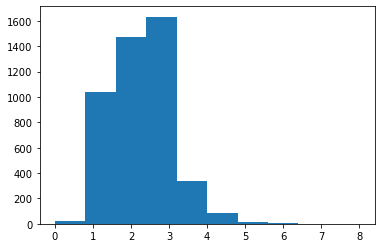

In [13]:
plt.hist(df['bathrooms']);

In [14]:
print(df.groupby(['floors'])['floors'].count().sort_values(ascending=False)) 
#houses mostly have bathrooms between 1 to 2.

floors
1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: floors, dtype: int64


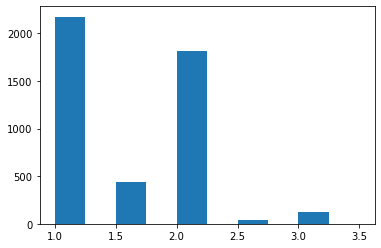

In [15]:
plt.hist(df['floors']);

In [16]:
print(df.groupby(['condition'])['condition'].count().sort_values(ascending=False)) 
#houses mostly have been considered in a good condition.

condition
3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64


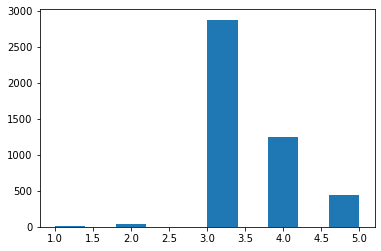

In [17]:
plt.hist(df['condition']);

In [18]:
print(df.groupby(['view'])['view'].count().sort_values(ascending=False)) 
#we can say that big proportion of houses has not a great view.

view
0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64


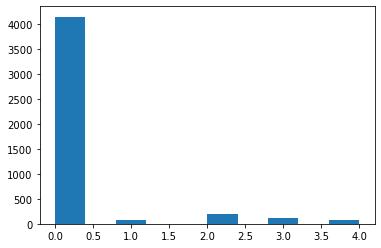

In [19]:
plt.hist(df['view']);

In [20]:
print(df.groupby(['waterfront'])['waterfront'].count().sort_values(ascending=False)) 

waterfront
0    4567
1      33
Name: waterfront, dtype: int64


In [21]:
print(df.groupby(['country'])['country'].count().sort_values(ascending=False)) 

country
USA    4600
Name: country, dtype: int64


In [22]:
print(df.groupby(['city'])['city'].count().sort_values(ascending=False)) 

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Vashon                   29
SeaTac                   29
Tukwila                  29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific        

In [23]:
#data visualization for better understanding & correlation analysis

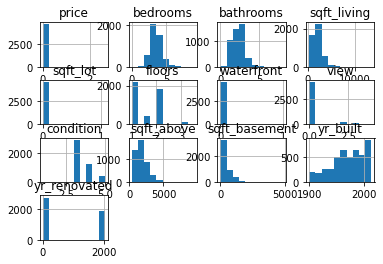

In [24]:
df.hist();

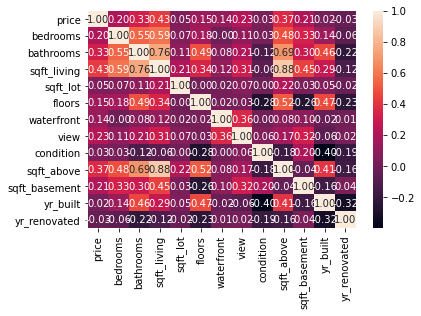

In [25]:
sns.heatmap(df.corr(), annot= True, fmt='.2f');

In [26]:
#let's answer some questions to gain insights

In [27]:
# Q1: what percentage of the houses have been renovated?

In [28]:
def renovated_or_not(x):
    
    #create a renovated flag to show if the house has been renovated or not
    df['renovated_flag'] = df['yr_renovated'].apply(lambda x: False if x == 0 else True)
    
    #count the number of houses which have been renovated
    renovated = df.groupby(['renovated_flag'])['renovated_flag'].count()[True]
    all = df.count()['renovated_flag']
    
    print("Percentage of houses which have been renovated is ", '{:.2f}%'.format(renovated/all))

In [29]:
renovated_or_not(df)

Percentage of houses which have been renovated is  0.41%


In [30]:
# Q2: Does renovation has a big impact on the condition of a house?

In [31]:
def renovation_impact(x):
    avg_yes_renovation = df.groupby(['renovated_flag'])['condition'].mean()[True]
    avg_no_renovation = df.groupby(['renovated_flag'])['condition'].mean()[False]
    avg_all = df['condition'].mean()
    
     
    if (avg_yes_renovation > avg_no_renovation) & (avg_yes_renovation > avg_all):
        print("Renovation has a big impact on the condition of a house.\n Average condition point of a house which has been renovated is", '{:.2f}'.format(avg_yes_renovation) , "\n Average condition point of a house which has not been renovated is", '{:.2f}'.format(avg_no_renovation) ,  "\n Average condition point of all houses no matter if it has been renovated or not is", '{:.2f}'.format(avg_all))
    else:
        print("Renovation has not a big impact on the condition of a house.\n Average condition point of a house which has been renovated is", '{:.2f}'.format(avg_yes_renovation) , "\n Average condition point of a house which has not been renovated is", '{:.2f}'.format(avg_no_renovation) ,  "\n Average condition point of all houses no matter if it has been renovated or not is", '{:.2f}'.format(avg_all))


In [32]:
renovation_impact(df)

Renovation has not a big impact on the condition of a house.
 Average condition point of a house which has been renovated is 3.30 
 Average condition point of a house which has not been renovated is 3.56 
 Average condition point of all houses no matter if it has been renovated or not is 3.45


In [33]:
# Q3: How many households are using more than half of their land as living space and what is the percentage?

In [34]:
def living_space(x):
    df['surface'] = df['sqft_living'] / df['sqft_lot']
    df['surface'] = df['surface'].apply(lambda x: 'large living space' if x > 0.50 else 'narrow living space')

    large = df.groupby(['surface'])['surface'].count()['large living space']
    all = df['surface'].count()
    
    print("Number of households who are using more than half of their land as living space is ", '{:.2f}'.format(large) , "and the percentage is ", '{:.2f}%'.format(large/all))

In [35]:
living_space(df)

Number of households who are using more than half of their land as living space is  806.00 and the percentage is  0.18%


In [436]:
#let's perform the model for prediction

In [36]:
#Modeling

In [37]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .45, random_state=42, plot=True):
    
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict() 
    
    for cutoff in cutoffs:
        
        
        #reduce X matris
        reduce_X = X.iloc[:, np.where((X.sum() > int(cutoff)) == True)[0]]
        num_feats.append(reduce_X.shape[1])
        
        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = .45, random_state=42)
        
        #global variable definition is crucial if you'll use the same variable out side of this function
        global lm_model 


        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)
        
        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)
        
    if plot:
        plt.plot(num_feats, r2_scores_test, label= 'Test', alpha=.5)
        plt.plot(num_feats, r2_scores_train, label= 'Train', alpha=.5)
        plt.xlabel('Number of features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of features')
        plt.legend(loc=1)
        plt.show()
        
        
    best_cutoff = max(results, key=results.get)
    
    #reduce X matris
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    
    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.45, random_state = 42)
    
    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)
    
    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

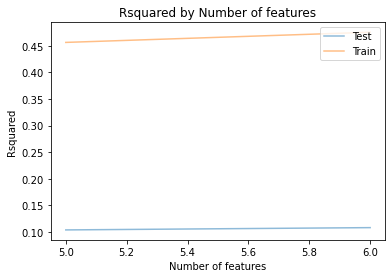

In [38]:
#cutoffs here pertains to the number of missing values allowed in the used columns
#therefore, lower values for the cutoff provides more predictors in the model
X = df[['bedrooms','bathrooms','view','sqft_living','floors','sqft_above']]
y = df['price']

cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25,10,5]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [39]:
#this function helps us to see which features are more efficient for model to predict the price
def coef_weights(coefficients, X_train):
    
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abc_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abc_coefs', ascending=False)
    return coefs_df

In [40]:
coefs_df = coef_weights(lm_model.coef_, X_train)

In [41]:
coefs_df.head()

,est_int,coefs,abc_coefs
2,view,72029.618920,72029.618920
0,bedrooms,-49565.192626,49565.192626
4,floors,49351.652507,49351.652507
1,bathrooms,-35337.052502,35337.052502
3,sqft_living,307.578123,307.578123


In [42]:
y_test_preds = lm_model.predict(X_test)

In [43]:
#r square is a statistical measure that represents the goodness of fit. the best possible score is 1.0
"The r square score for the model using only quantitative variables was {} on {} values".format(r2_score(y_test,y_test_preds), len(y_test))

'The r square score for the model using only quantitative variables was 0.10774889551306044 on 2070 values'

In [44]:
y_train_preds = lm_model.predict(X_train)

In [45]:
#r square is a statistical measure that represents the goodness of fit. the best possible score is 1.0
"The r square score for the model using only quantitative variables was {} on {} values".format(r2_score(y_train,y_train_preds), len(y_train))

'The r square score for the model using only quantitative variables was 0.47582445012100416 on 2530 values'

In [ ]:
#Evaluation
#Our coefficient analysis shows us that view and number of bedrooms of a house have a big impact 
#on the price of a house.